# [실습]서울시 구별 CCTV 현황 분석
- CCTV가 어느 구에 가장 많이 설치되었는지 알아보기
- 구별 인구 대비 CCTV 설치 비율 알아보기 
- 구별 CCTV 현황 시각화해보기

사용하는 데이터
- 서울 열린데이터 광장에서 서울시 구별 CCTV 설치 현황데이터(서울시CCTV설치운영현황(자치구)_년도별_210731기준.csv)
- 서울 열린데이터 광장에서 서울시 주민등록인구 (구별) 통계데이터

In [2]:
# 필요한 libary import

import pandas as pd
import numpy as np

In [3]:
# 서울시 구별 CCTV 설치 현황데이터 불러오기
CCTV_seoul= pd.read_csv('CCTV_in_seoul.csv', encoding='cp949',header=1)
CCTV_seoul.head()

,구분,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,계,"77,032","7,667","2,200","3,491","4,439","6,582","8,129","9,947","9,876","11,961","11,132","1,608"
1,종로구,"1,772",813,0,0,210,150,1,261,85,9,200,43
2,중 구,"2,333",16,114,87,77,236,240,372,386,155,361,289
3,용산구,"2,383",34,71,234,125,221,298,351,125,307,617,0
4,성동구,"3,602",448,125,212,105,339,310,874,390,262,461,76


In [4]:
# 구분을 구별로 이름 변경
CCTV_seoul.rename(columns={'구분':'구별'},inplace=True)
CCTV_seoul.head()

,구별,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,계,"77,032","7,667","2,200","3,491","4,439","6,582","8,129","9,947","9,876","11,961","11,132","1,608"
1,종로구,"1,772",813,0,0,210,150,1,261,85,9,200,43
2,중 구,"2,333",16,114,87,77,236,240,372,386,155,361,289
3,용산구,"2,383",34,71,234,125,221,298,351,125,307,617,0
4,성동구,"3,602",448,125,212,105,339,310,874,390,262,461,76


In [5]:
# 서울시 인구 데이터 불러오기 
# 필요한 칼럼만 가져오기
pop_seoul=pd.read_excel('population_in_seoul.xls',header=2,
                       usecols='B,D,G,J,N')
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,9765869,9542256,223613,1592339
1,종로구,154318,145512,8806,27776
2,중구,131943,122858,9085,24225
3,용산구,238300,224145,14155,38906
4,성동구,294140,287820,6320,46053


In [6]:
# 칼럼이름 변경
pop_seoul.rename(columns={'자치구':'구별',
                          '계':'인구수',
                         '계.1':'한국인',
                         '계.2':'외국인',
                         '65세이상고령자':'고령자'},inplace=True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,9765869,9542256,223613,1592339
1,종로구,154318,145512,8806,27776
2,중구,131943,122858,9085,24225
3,용산구,238300,224145,14155,38906
4,성동구,294140,287820,6320,46053


## 데이터 탐색 - CCTV 현황데이터

In [7]:
# CCTV 개수가 가장 많은 구 top5
CCTV_seoul.sort_values(by='총계',ascending=True).head()

,구별,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
10,도봉구,"1,629",39,22,96,181,79,159,134,222,198,168,331
1,종로구,"1,772",813,0,0,210,150,1,261,85,9,200,43
20,동작구,"2,297",41,24,25,503,128,253,271,300,322,419,11
2,중 구,"2,333",16,114,87,77,236,240,372,386,155,361,289
18,금천구,"2,374",0,0,178,80,361,133,196,540,369,508,9


숫자형이 아니라 원하던 대로 정렬이 되지 않았음 , 숫자형으로 변경해줘야 함

In [8]:
CCTV_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   구별        26 non-null     object
 1   총계        26 non-null     object
 2   2012년 이전  26 non-null     object
 3   2012년     26 non-null     object
 4   2013년     26 non-null     object
 5   2014년     26 non-null     object
 6   2015년     26 non-null     object
 7   2016년     26 non-null     object
 8   2017년     26 non-null     object
 9   2018년     26 non-null     object
 10  2019년     26 non-null     object
 11  2020년     26 non-null     object
 12  2021년     26 non-null     object
dtypes: object(13)
memory usage: 2.8+ KB


In [9]:
# 자리수 구분자인 , 제거
for i in range(1,13):
    CCTV_seoul[CCTV_seoul.columns[i]]=CCTV_seoul[CCTV_seoul.columns[i]].str.replace(',','') # 총계~2021년까지 , 제거

CCTV_seoul.head()

,구별,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,계,77032,7667,2200,3491,4439,6582,8129,9947,9876,11961,11132,1608
1,종로구,1772,813,0,0,210,150,1,261,85,9,200,43
2,중 구,2333,16,114,87,77,236,240,372,386,155,361,289
3,용산구,2383,34,71,234,125,221,298,351,125,307,617,0
4,성동구,3602,448,125,212,105,339,310,874,390,262,461,76


In [10]:
# 구별을 제외하고 나머지 모두 숫자형으로 변환

for i in range(1,13):
    CCTV_seoul[CCTV_seoul.columns[i]]=CCTV_seoul[CCTV_seoul.columns[i]].astype(int) # 총계~2021년까지 숫자형으로 변환
CCTV_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   구별        26 non-null     object
 1   총계        26 non-null     int32 
 2   2012년 이전  26 non-null     int32 
 3   2012년     26 non-null     int32 
 4   2013년     26 non-null     int32 
 5   2014년     26 non-null     int32 
 6   2015년     26 non-null     int32 
 7   2016년     26 non-null     int32 
 8   2017년     26 non-null     int32 
 9   2018년     26 non-null     int32 
 10  2019년     26 non-null     int32 
 11  2020년     26 non-null     int32 
 12  2021년     26 non-null     int32 
dtypes: int32(12), object(1)
memory usage: 1.5+ KB


In [11]:
# CCTV 개수가 가장 많은 구 top5
CCTV_seoul.sort_values(by='총계',ascending=False).head(6)

,구별,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,계,77032,7667,2200,3491,4439,6582,8129,9947,9876,11961,11132,1608
23,강남구,6502,124,77,75,597,840,1310,999,748,789,942,1
21,관악구,4942,428,205,291,513,529,621,687,663,640,331,34
17,구로구,4075,852,216,349,187,268,326,540,488,434,415,0
8,성북구,3958,83,78,170,230,323,594,460,867,714,251,188
12,은평구,3791,14,3,44,332,329,555,403,635,1057,288,131


CCTV 개수가 가장 많은 구는 강남구, 관악구, 구로구, 성북구, 은평구 순이다.

In [12]:
# CCTV 개수가 가장 적은 구 top5
CCTV_seoul.sort_values(by='총계',ascending=True).head()

,구별,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
10,도봉구,1629,39,22,96,181,79,159,134,222,198,168,331
1,종로구,1772,813,0,0,210,150,1,261,85,9,200,43
20,동작구,2297,41,24,25,503,128,253,271,300,322,419,11
2,중 구,2333,16,114,87,77,236,240,372,386,155,361,289
18,금천구,2374,0,0,178,80,361,133,196,540,369,508,9


CCTV 개수가 가장 많은 구는 도봉구, 종로구, 동작구, 중구, 금천구 순이다.

In [13]:
### CCTV 최근 3년간 증가율 구하기
CCTV_seoul['최근증가율']=(CCTV_seoul['2021년']+CCTV_seoul['2020년']+CCTV_seoul['2019년'])/(CCTV_seoul['2012년 이전']+CCTV_seoul['2012년']+CCTV_seoul['2013년']+CCTV_seoul['2014년']+CCTV_seoul['2015년']+CCTV_seoul['2016년']+CCTV_seoul['2017년']+CCTV_seoul['2018년'])*100
CCTV_seoul.sort_values(by='최근증가율',ascending=False).head()

,구별,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,최근증가율
9,강북구,2462,0,0,24,65,105,243,6,392,1000,588,39,194.850299
7,중랑구,3296,302,24,253,88,141,161,162,173,1049,939,4,152.760736
24,송파구,2854,72,61,86,85,215,148,241,542,1068,235,101,96.827586
10,도봉구,1629,39,22,96,181,79,159,134,222,198,168,331,74.785408
12,은평구,3791,14,3,44,332,329,555,403,635,1057,288,131,63.758099


최근 3년간 CCTV가 가장 많이 증가한 구는 강북구, 중랑구, 송파구, 도봉구, 은평구 순이다.

## 데이터 탐색 - 서울시 인구현황데이터

In [14]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,9765869,9542256,223613,1592339
1,종로구,154318,145512,8806,27776
2,중구,131943,122858,9085,24225
3,용산구,238300,224145,14155,38906
4,성동구,294140,287820,6320,46053


In [15]:
# 합계행 제거하기
pop_seoul.drop([0],inplace=True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,154318,145512,8806,27776
2,중구,131943,122858,9085,24225
3,용산구,238300,224145,14155,38906
4,성동구,294140,287820,6320,46053
5,광진구,353380,341112,12268,51278


In [16]:
pop_seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [42]:
CCTV_seoul['구별'].unique()

array(['계', '종로구', '중 구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구',
       '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구',
       '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'],
      dtype=object)

In [46]:
CCTV_seoul['구별'].replace('중 구','중구',inplace = True) 
CCTV_seoul['구별'].unique()

array(['계', '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [47]:
pop_seoul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 1 to 25
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구별      25 non-null     object 
 1   인구수     25 non-null     int64  
 2   한국인     25 non-null     int64  
 3   외국인     25 non-null     int64  
 4   고령자     25 non-null     int64  
 5   외국인비율   25 non-null     float64
 6   고령자비율   25 non-null     float64
dtypes: float64(2), int64(4), object(1)
memory usage: 1.6+ KB


In [48]:
# 구별 외국인 비율 & 구별 고령자비율 계산하기
pop_seoul['외국인비율']=pop_seoul['외국인']/pop_seoul['인구수']*100
pop_seoul['고령자비율']=pop_seoul['고령자']/pop_seoul['인구수']*100
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,154318,145512,8806,27776,5.706398,17.999196
2,중구,131943,122858,9085,24225,6.885549,18.360201
3,용산구,238300,224145,14155,38906,5.939992,16.326479
4,성동구,294140,287820,6320,46053,2.148637,15.656830
5,광진구,353380,341112,12268,51278,3.471617,14.510725


In [49]:
# 인구수가 가장 많은 구 top5
pop_seoul.sort_values(by='인구수',ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,664996,659385,5611,96453,0.843764,14.504298
16,강서구,581265,575875,5390,91505,0.927288,15.742389
23,강남구,538075,533359,4716,77222,0.876458,14.351531
11,노원구,517038,513053,3985,87537,0.770736,16.930477
21,관악구,501572,488029,13543,79444,2.700111,15.839002


인구수가 가장 많은 구는 송파구, 강서구, 강남구, 노원구, 관악구 순이다.

In [50]:
# 외국인 비율이 가장 높은 구 top5
pop_seoul.sort_values(by='외국인비율',ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
2,중구,131943,122858,9085,24225,6.885549,18.360201
19,영등포구,401814,377536,24278,62108,6.042099,15.456903
3,용산구,238300,224145,14155,38906,5.939992,16.326479
17,구로구,422361,397506,24855,71930,5.884776,17.030455
18,금천구,244887,230644,14243,40691,5.816152,16.616235


외국인 비율이 가장 높은 구는 중구, 영등포구, 용산구, 구로구, 금천구 순이다.

In [51]:
# 고령자 비율이 가장 높은 구 top5
pop_seoul.sort_values(by='고령자비율',ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,304257,300887,3370,63914,1.107616,21.006583
10,도봉구,320711,318718,1993,63448,0.621432,19.783543
2,중구,131943,122858,9085,24225,6.885549,18.360201
12,은평구,477961,474062,3899,86724,0.815757,18.144577
7,중랑구,393149,388554,4595,70908,1.168768,18.035910


외국인 비율이 가장 높은 구는 강북구, 도봉구, 중구, 은평구, 중랑구 순이다.

In [52]:
merged_data = pd.merge(CCTV_seoul, pop_seoul, on='구별')
merged_data.head()

,구별,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,종로구,1772,813,0,0,210,150,1,261,85,9,200,43,16.578947,154318,145512,8806,27776,5.706398,17.999196
1,중구,2333,16,114,87,77,236,240,372,386,155,361,289,52.683246,131943,122858,9085,24225,6.885549,18.360201
2,용산구,2383,34,71,234,125,221,298,351,125,307,617,0,63.331049,238300,224145,14155,38906,5.939992,16.326479
3,성동구,3602,448,125,212,105,339,310,874,390,262,461,76,28.505173,294140,287820,6320,46053,2.148637,15.656830
4,광진구,2588,35,57,100,187,98,52,675,465,712,175,32,55.062912,353380,341112,12268,51278,3.471617,14.510725


In [53]:
# 필요한 열만 추출해오기
data_result = merged_data[['구별','총계','최근증가율','인구수','한국인','외국인','고령자','외국인비율','고령자비율']]
data_result.head()

,구별,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,종로구,1772,16.578947,154318,145512,8806,27776,5.706398,17.999196
1,중구,2333,52.683246,131943,122858,9085,24225,6.885549,18.360201
2,용산구,2383,63.331049,238300,224145,14155,38906,5.939992,16.326479
3,성동구,3602,28.505173,294140,287820,6320,46053,2.148637,15.656830
4,광진구,2588,55.062912,353380,341112,12268,51278,3.471617,14.510725


In [54]:
# 구별을 인덱스로 설정하기
data_result.set_index('구별',inplace=True)
data_result.head()

,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
종로구,1772,16.578947,154318,145512,8806,27776,5.706398,17.999196
중구,2333,52.683246,131943,122858,9085,24225,6.885549,18.360201
용산구,2383,63.331049,238300,224145,14155,38906,5.939992,16.326479
성동구,3602,28.505173,294140,287820,6320,46053,2.148637,15.656830
광진구,2588,55.062912,353380,341112,12268,51278,3.471617,14.510725


### 상관계수를 통한 상관분석

In [55]:
# 고령자비율 - 총계
np.corrcoef(data_result['고령자비율'],data_result['총계'])

array([[ 1.        , -0.39545181],
       [-0.39545181,  1.        ]])

In [56]:
# 외국인비율 - 총계
np.corrcoef(data_result['외국인비율'],data_result['총계'])

array([[ 1.        , -0.17435971],
       [-0.17435971,  1.        ]])

In [57]:
# 인구수 - 총계
np.corrcoef(data_result['인구수'],data_result['총계'])

array([[1.        , 0.45857718],
       [0.45857718, 1.        ]])

In [58]:
# 상관계수 한번에 확인
data_result.corr()

,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
총계,1.000000,-0.222063,0.458577,0.447441,0.129437,0.377166,-0.174360,-0.395452
최근증가율,-0.222063,1.000000,0.016273,0.030791,-0.308557,0.171370,-0.278845,0.501795
인구수,0.458577,0.016273,1.000000,0.998913,-0.204832,0.949590,-0.663156,-0.465020
한국인,0.447441,0.030791,0.998913,1.000000,-0.250235,0.951195,-0.693711,-0.453593
외국인,0.129437,-0.308557,-0.204832,-0.250235,1.000000,-0.249894,0.792564,-0.134087
고령자,0.377166,0.171370,0.949590,0.951195,-0.249894,1.000000,-0.706316,-0.177362
외국인비율,-0.174360,-0.278845,-0.663156,-0.693711,0.792564,-0.706316,1.000000,0.089509
고령자비율,-0.395452,0.501795,-0.465020,-0.453593,-0.134087,-0.177362,0.089509,1.000000


#### 총계 - 인구수, 총계 - 고령자비율, 최근 증가율 - 고령자비율아 약한 상관관계를 보임.


In [59]:
# 시각화를 위한 패키지들 import

import platform
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib import font_manager, rc # 한글 폰트 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font',family = 'AppleGothic')
elif platform.system()=='Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font',family = font_name)
else:
    print('Unknown System... ')

<AxesSubplot:>

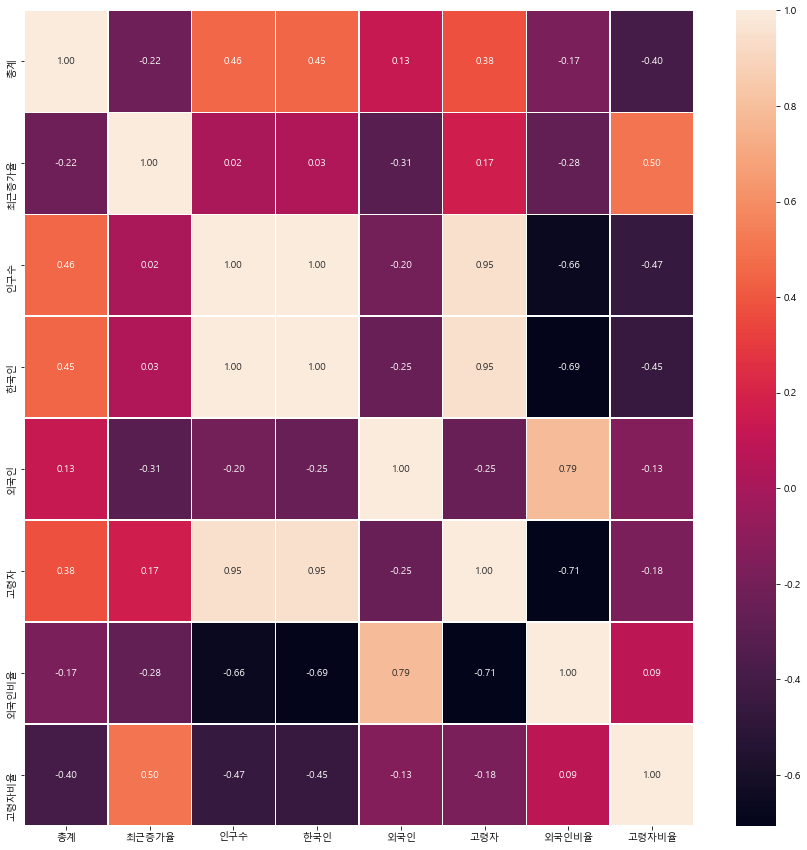

In [60]:
# 상관분석 heatmap으로 시각화
plt.figure(figsize=(15,15))
sns.heatmap(data=data_result.corr(), annot=True, fmt='.2f',linewidths=.5)

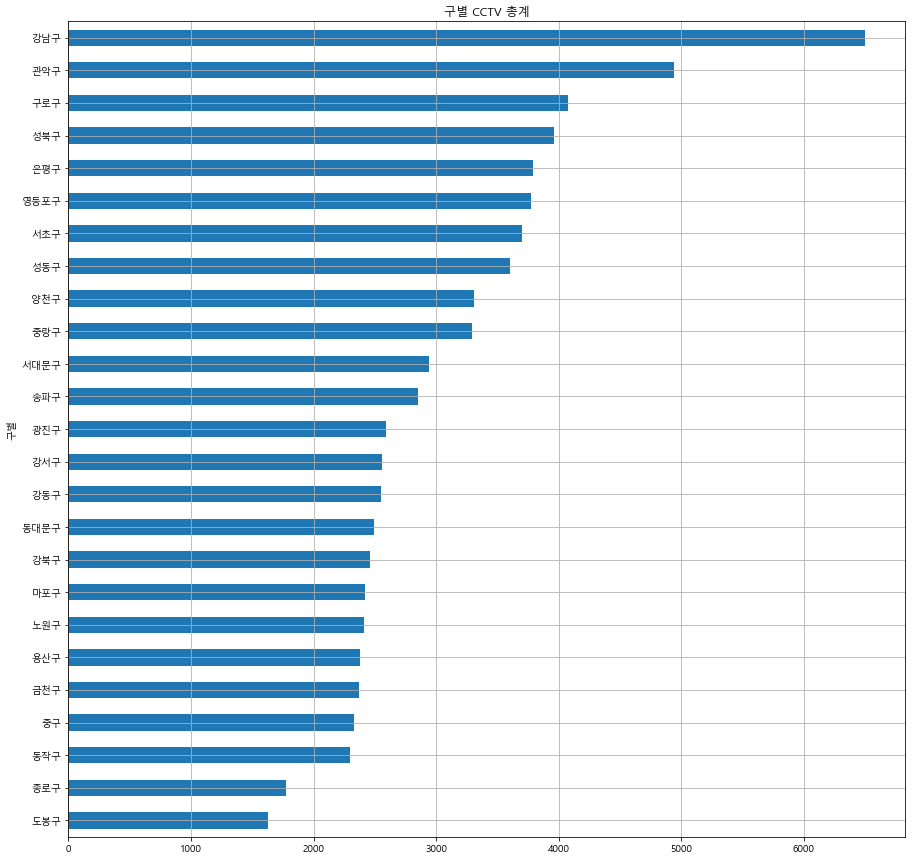

In [61]:
# CCTV 개수 시각화(구별)
data_result['총계'].sort_values().plot(kind='barh',
                                     grid=True, 
                                     figsize=(15,15),
                                     title='구별 CCTV 총계'
                                    )
plt.show()

<ipython-input-63-9ce61bed25a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_result['cctv비율'] = data_result['총계']/data_result['인구수']*100


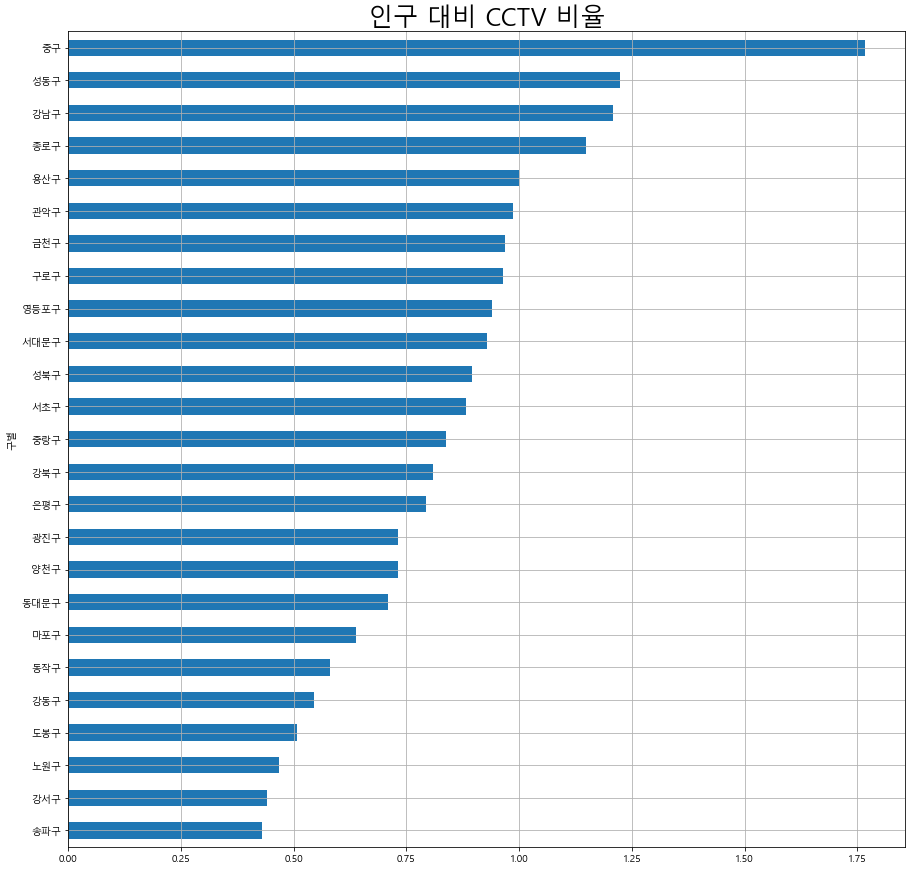

In [63]:
# 인구대비 CCTV 비율 시각화
data_result['cctv비율'] = data_result['총계']/data_result['인구수']*100
data_result['cctv비율'].sort_values().plot(kind='barh',
                                        grid=True,
                                        figsize=(15,15)
                                        )
plt.title('인구 대비 CCTV 비율', fontsize=25)
plt.show()

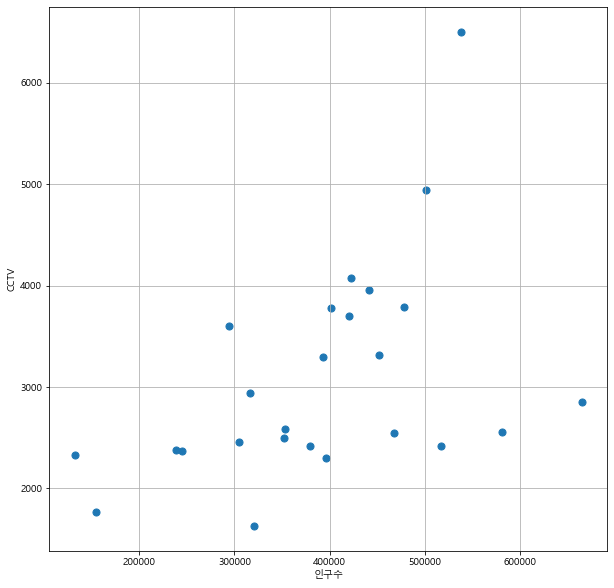

In [64]:
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['총계'],s = 50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

#### 인구수와 CCTV는 약한 양의 상관관계가 있으므로, 이 데이표들을 대표하는 직선 그리기

In [65]:
fp1 = np.polyfit(data_result['인구수'], data_result['총계'],1)
fp1

array([3.86915432e-03, 1.56985383e+03])

In [66]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000,700000,100)

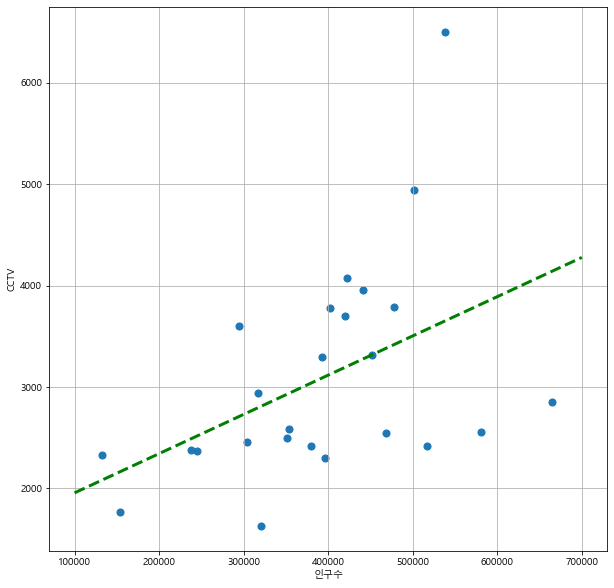

In [67]:
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['총계'],s = 50)
plt.plot(fx, f1(fx),ls='dashed',lw=3,color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

#### 직선에서 멀리있는 지역 구의 이름과, 색을 변경하기

In [68]:
fp1 = np.polyfit(data_result['인구수'],data_result['총계'],1)
# 오차를 계산할 수 있는 코드를 만들고, 오차가 큰순으로 데이터 다시 저장
f1 = np.poly1d(fp1)
fx = np.linspace(100000,700000,100)
data_result['오차'] = np.abs(data_result['총계']-f1(data_result['인구수']))

df_sort = data_result.sort_values(by='오차',ascending=False)
df_sort.head()

<ipython-input-68-6f8fa3dfebe3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_result['오차'] = np.abs(data_result['총계']-f1(data_result['인구수']))


,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율,오차
구별,,,,,,,,,,
강남구,6502,36.310273,538075,533359,4716,77222,0.876458,14.351531,1.208382,2850.250959
관악구,4942,25.527051,501572,488029,13543,79444,2.700111,15.839002,0.985302,1431.486699
송파구,2854,96.827586,664996,659385,5611,96453,0.843764,14.504298,0.429176,1288.825976
강서구,2560,57.635468,581265,575875,5390,91505,0.927288,15.742389,0.440419,1258.857816
도봉구,1629,74.785408,320711,318718,1993,63448,0.621432,19.783543,0.507934,1181.734182


In [69]:
# 데이터 저장해두기
data_result.to_csv('서울시_구별_cctv수_인구수.csv',index='구별', encoding="utf-8-sig")


#### 서울시 구별 CCTV현황 분석 최종 시각화

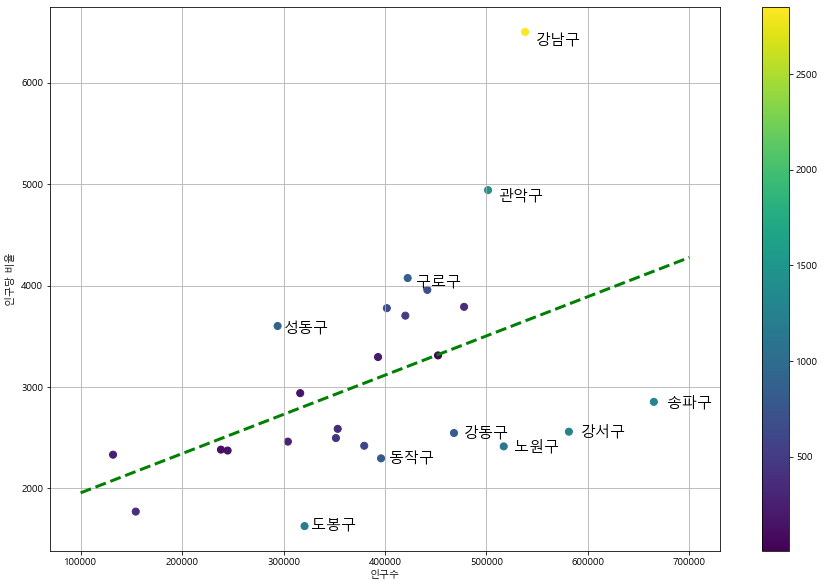

In [70]:
plt.figure(figsize=(15,10))
plt.scatter(data_result['인구수'], data_result['총계'],
           c = data_result['오차'], s = 50)
plt.plot(fx, f1(fx), ls ='dashed', lw = 3, color = 'g')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['총계'][n]*0.98,
            df_sort.index[n], fontsize = 15)
plt.xlabel('인구수')
plt.ylabel('인구당 비율')

plt.colorbar()
plt.grid()
plt.show()

## 서울시 구별 CCTV 현황 분석 결론

#### 서울시 전체 지역의 일반적인 경향을 기준으로 볼때, 
- CCTV가 많이 설치된 지역(직선 위쪽) : '강남구', '관악구', '구로구', '성동구'
- 일반적인 경향보다 CCTV가 적게 설치된 지역(직선 아래쪽) : '도봉구', '동작구', '강동구', '노원구', '강서구', '송파구'

##### 특히, 강남구는 월등히 많은 CCTV수가  설치됐지만, 송파구는 인구수에 비해 상당히 적은 수의 CCTV를 가지고 있다.